In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import sys
sys.path.insert(0,"../common_python")
from common_python.tellurium.experiment_runner import ExperimentRunner
from common_python.tellurium.model import Model

In [2]:
model_str1 = """
     A -> B; k1*A
     B-> C; k2*B
      
     A = 50; 
     B = 0;
     C = 0;
     k1 = 0.15
     k2 = 0.2
"""
model_str2 = """
     A -> B+C; k1*A
      
     A = 50; 
     B = 0;
     C = 0;
     k1 = 0.15
"""
model_str3 = """
     A -> B; k3*A
     A-> C; k4*A
      
     A = 50; 
     B = 0;
     C = 0;
     k3 = 0.2
     k4 = 0.02
"""

simulation_time = 30
num_points = 10

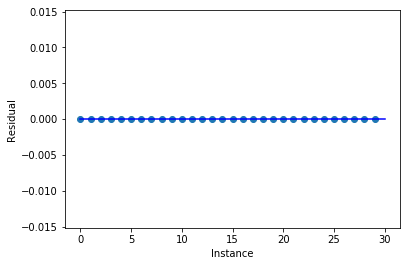

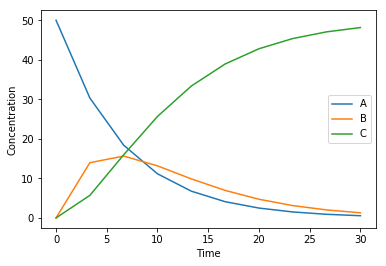

In [9]:
model = Model(model_str1, ['k1', 'k2'], simulation_time, num_points)
df, _ = model.runSimulation()
model.plotResiduals(df)
model.plotData()

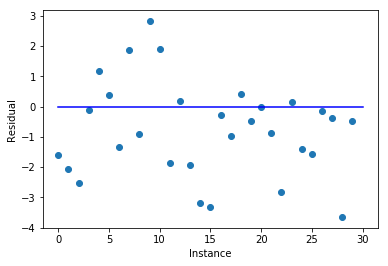

1.5445554404249113


In [4]:
runner = ExperimentRunner(model_str1, ['k1', 'k2'], simulation_time, num_points,
                         noise_std=2)
df_obs, ser_time = runner.makeObservations()
runner.plotResiduals(df_obs)
print(np.std(runner.calcResiduals(df_obs)))

In [5]:
runner.print()
print(runner.parameters)
print(runner.fit(count=5))
print(runner.parameters)


     A -> B; k1*A
     B-> C; k2*B
      
     A = 50; 
     B = 0;
     C = 0;
     k1 = 0.15
     k2 = 0.2

Parameters()
        mean       std
k1  0.168386  0.008720
k2  0.205429  0.008894
Parameters([('k1', <Parameter 'k1', 0.1683858571096658, bounds=[0:10]>), ('k2', <Parameter 'k2', 0.20542933991938508, bounds=[0:10]>)])


In [6]:
len(runner.ser_time)

10

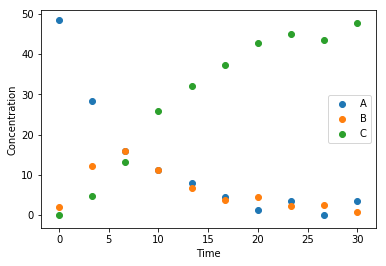

In [7]:
runner.plotData(df_observation=df_obs, is_scatter=False)

In [8]:
runner.plotData(is_)

NameError: name 'is_' is not defined

In [ ]:
STOP

In [ ]:
runner = ExperimentRunner(model_str1, ['k1', 'k2'],
                    simulation_time, num_points)
runner.print()
runner.fit(count=10, method='differential_evolution')

In [ ]:
print(model_str2)
runner = ExperimentRunner(model_str2, ['k1'],
                    simulation_time, num_points)
runner.fit(count=10)

In [ ]:
print(model_str3)
runner = ExperimentRunner(model_str3, ['k3', 'k4'],
                    simulation_time, simulation_time)
runner.fit(count=5, method="differential_evolution")

In [ ]:
print(model_str3)
runner = ExperimentRunner(model_str3, ['k3', 'k4'],
                    simulation_time, simulation_time, noise_std=1.0)
runner.fit(count=5, method="differential_evolution")

## Generating Folds

In [12]:
def foldGenerator(num_points, num_folds):
   indices = range(num_points)
   for remainder in range(num_folds):
       test_indices = []
       for idx in indices:
         if idx % num_folds == remainder:
           test_indices.append(idx)
       train_indices = np.array(
           list(set(indices).difference(test_indices)))
       test_indices = np.array(test_indices)
       yield train_indices, test_indices

In [14]:
folder = foldGenerator(10, 2)
for fold in folder:
    print(fold)

(array([1, 3, 5, 7, 9]), array([0, 2, 4, 6, 8]))
(array([0, 2, 4, 6, 8]), array([1, 3, 5, 7, 9]))


In [17]:
data = np.array(range(10))
data = np.reshape(data, (5,2))
data

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [18]:
indices = [0, 2]
data[indices, :]

array([[0, 1],
       [4, 5]])

In [19]:
import numpy as np
np.var([1, 2,3])

0.6666666666666666